In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import load_npz

In [4]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc

In [5]:
X = load_npz('./data/X.npz')
y = np.loadtxt('./data/y.csv', dtype=int, delimiter=',')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [9]:
import joblib

vectorizer = joblib.load("./models/verifai_vectorizer.pkl")
model = joblib.load("./models/verifai_voting_model.pkl")

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Accuracy: 0.9918158567774936
Precision: 0.9899084721896269
Recall: 0.9950460014154282
F1 Score: 0.9924705882352941

Classification Report:
               precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3581
        Real       0.99      1.00      0.99      4239

    accuracy                           0.99      7820
   macro avg       0.99      0.99      0.99      7820
weighted avg       0.99      0.99      0.99      7820



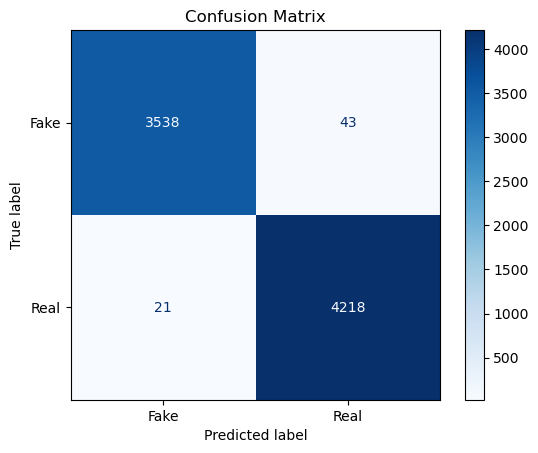

In [11]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Fake', 'Real'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

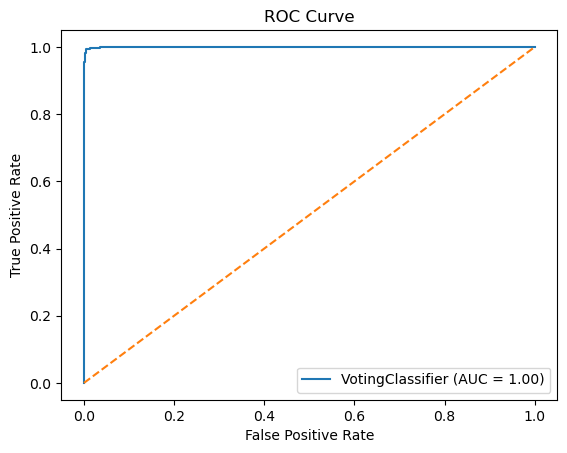

In [12]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'VotingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()